# 1.7. Plotting With Python

### Warmup:
What is good or bad about the following data visualisations?

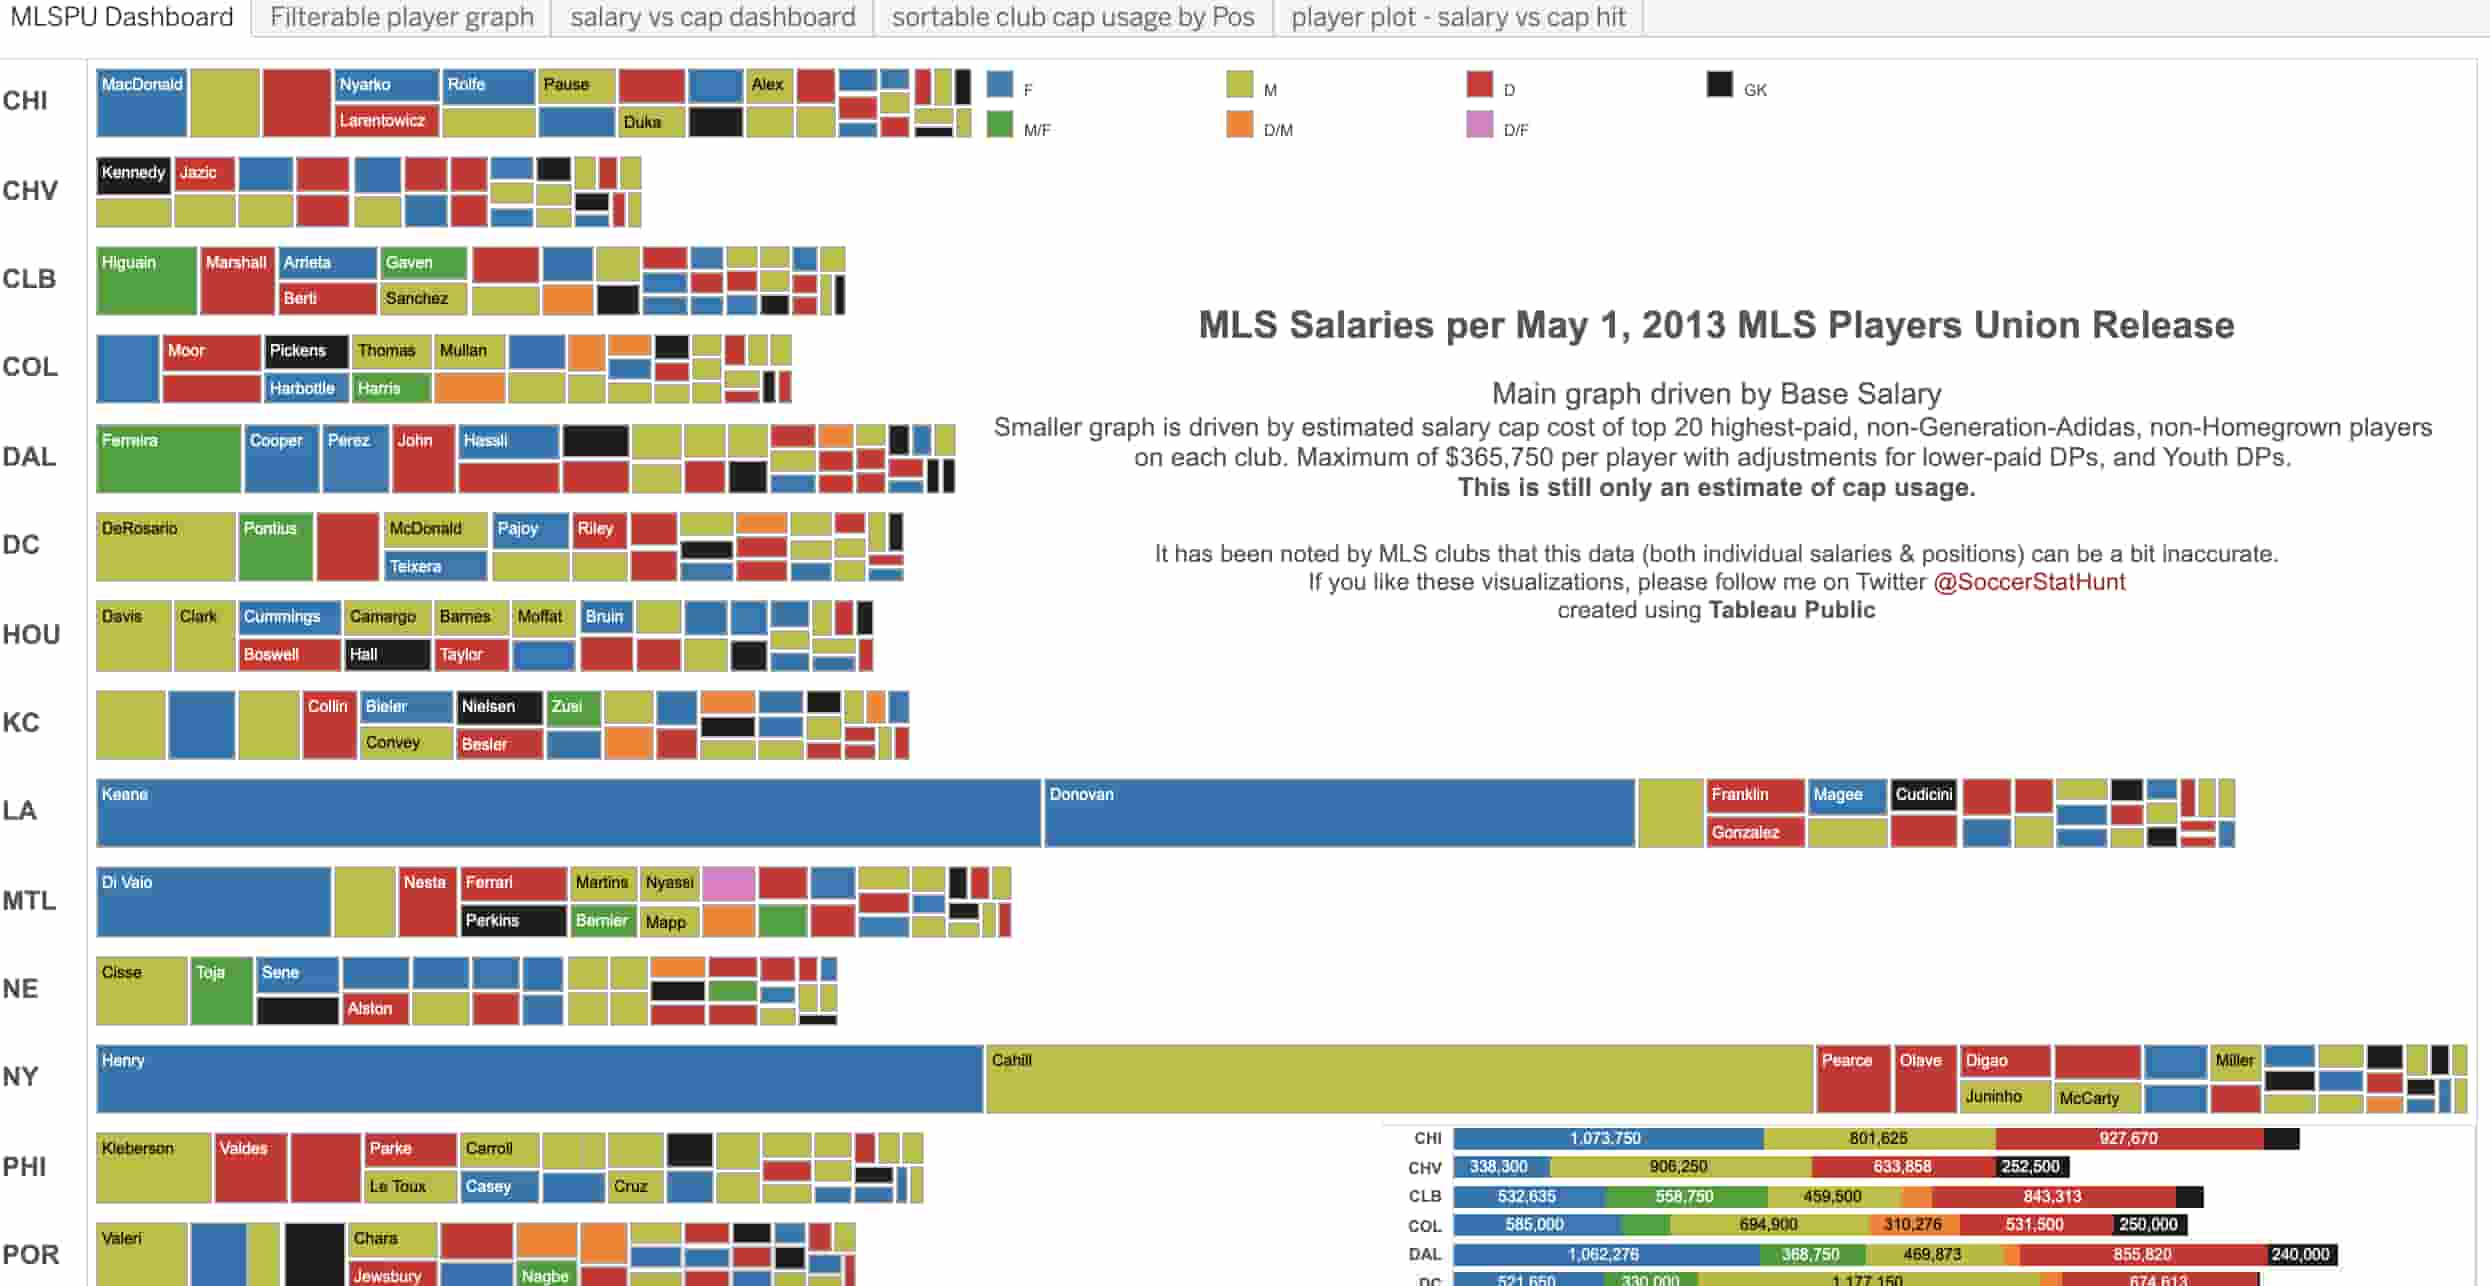
[source](https://blog.hubspot.com/marketing/great-data-visualization-examples) 

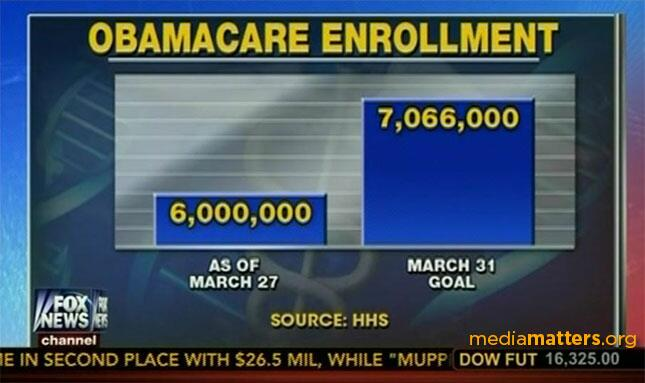
[source](https://flowingdata.com/2014/04/04/fox-news-bar-chart-gets-it-wrong/)

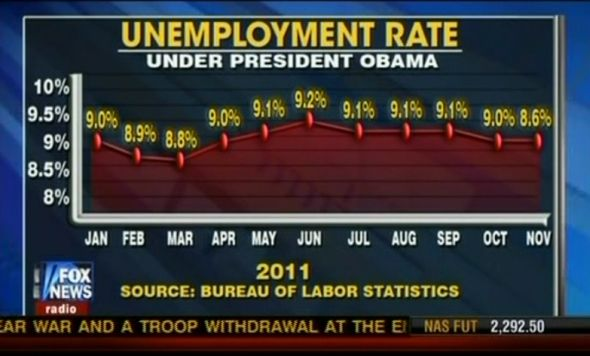
[source](https://flowingdata.com/2011/12/12/fox-news-still-makes-awesome-charts/)

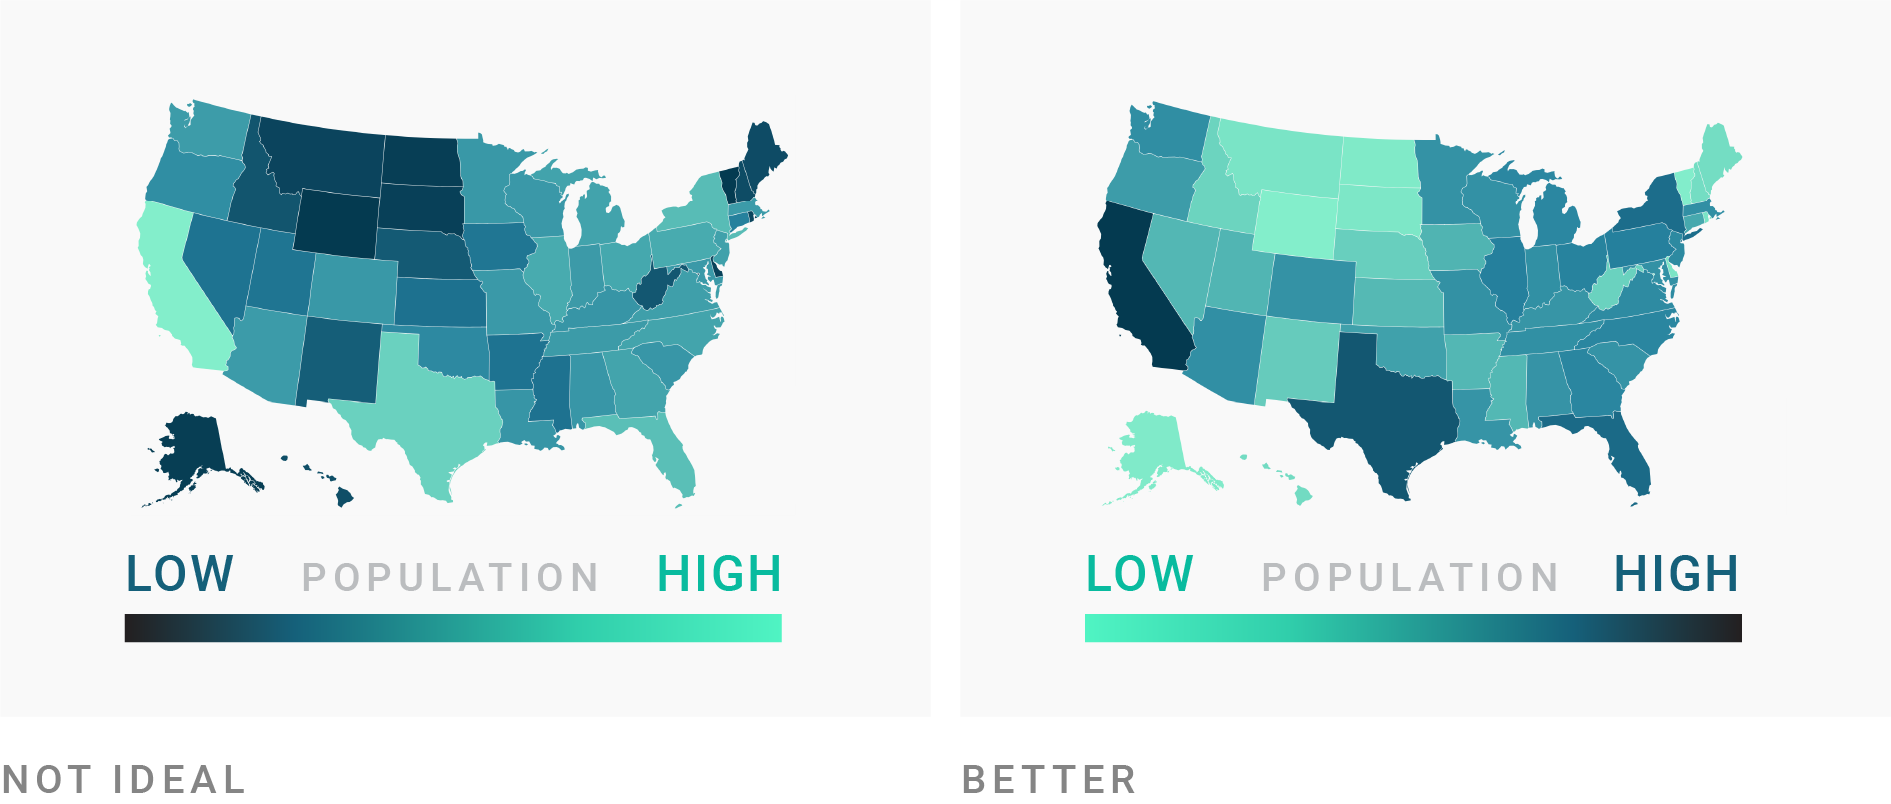
[source](https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization)

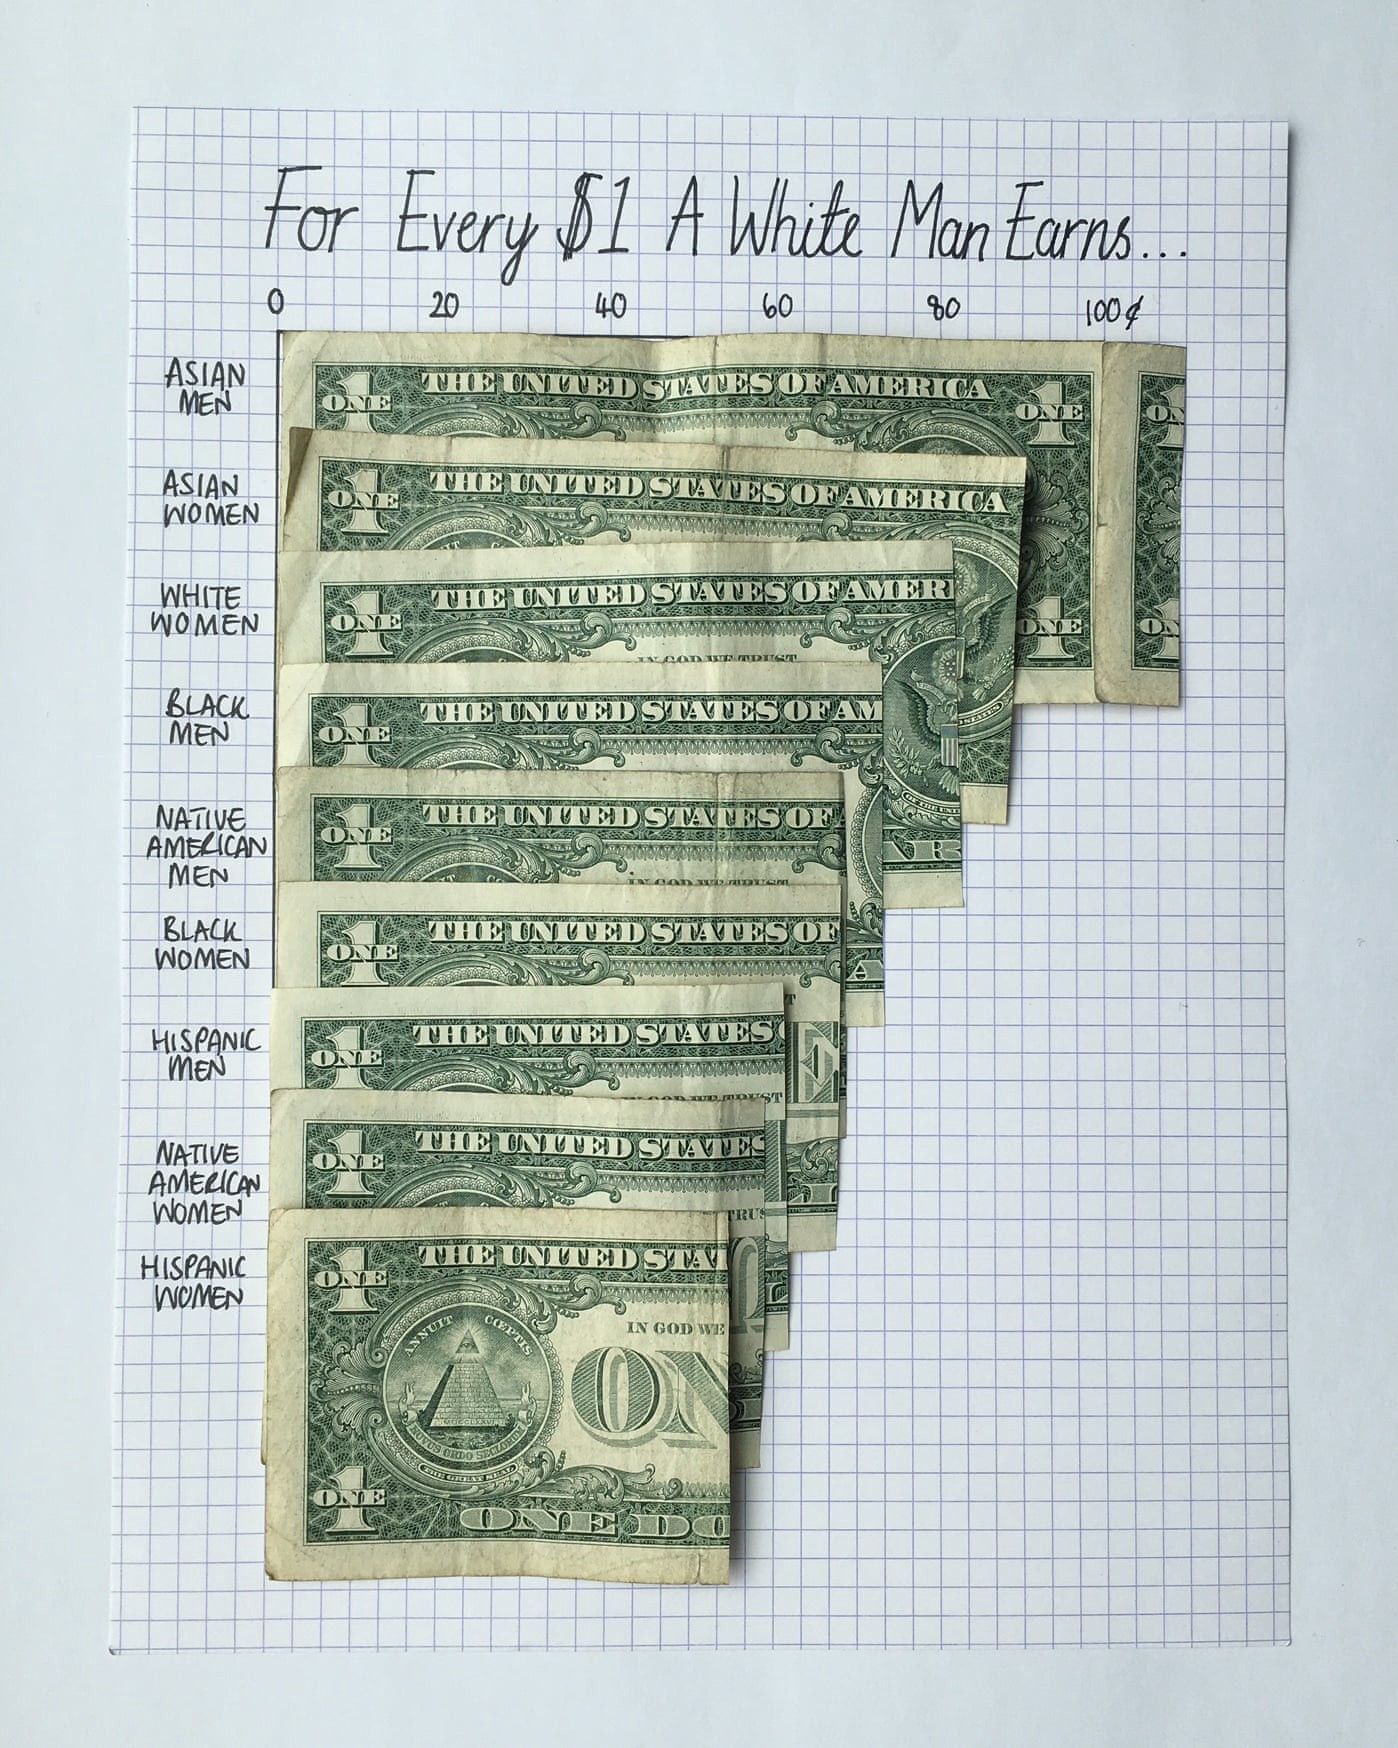
[source](https://medium.com/nightingale/power-to-the-powerless-an-interview-with-mona-chalabi-39d73647d80a)

### Why do we need plots? 



- not everybody is keen on numbers
- simple and efficient
- can immediately see trends 
- broader perspective
- to see all the data at once
- a good tool to present work
- to be able to draw conclusions/ see correlation 

### Anatomy of a Plot

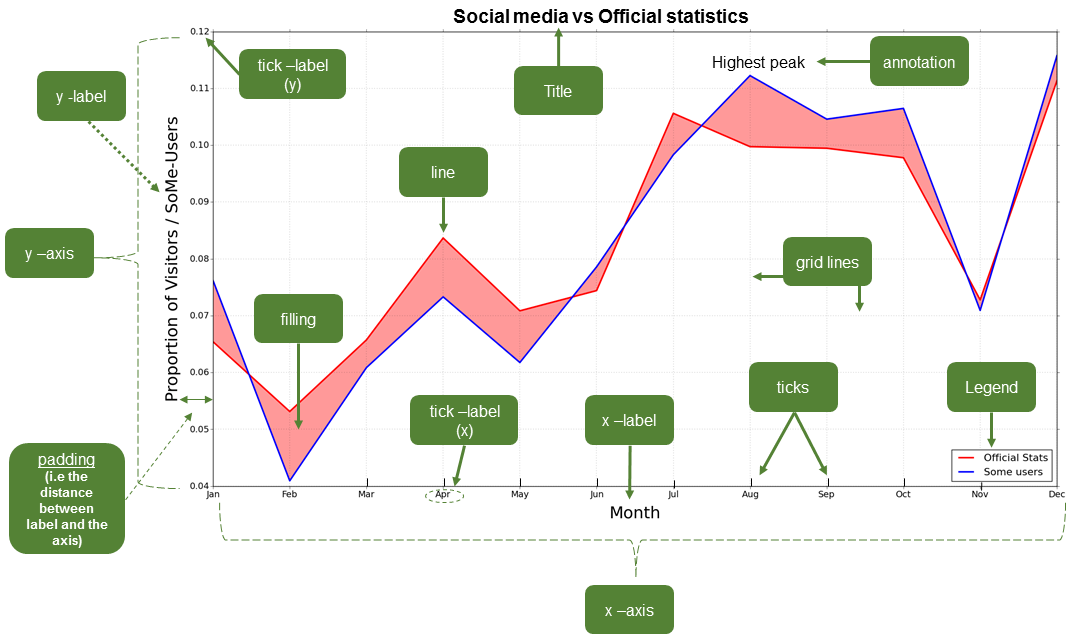
[source](https://geo-python.github.io/2017/lessons/L7/plot-anatomy.html)

## Visualizing the penguin dataset

In [15]:
import pandas as pd

In [17]:
# Load the penguins dataset: two ways, either as a CSV or from Seaborn directly:
df=pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [18]:
# check the shape
df.shape

(344, 7)

In [20]:
# check the Nan-values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [22]:
# drop Nan_values 

df.dropna(inplace=True)
# This is equivalent to doing this:
#df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [23]:
# check the shape again
df.shape

(333, 7)

In [24]:
# The dataset is pre-installed with seaborn and can be accessed here:
import seaborn as sns

In [26]:
#from Seaborn directly:
#list of the datasets in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [28]:
# load directly from seaborn
df_sns=sns.load_dataset('penguins')
df_sns.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



## 1. Plotting with pandas

- plotting with pandas is based on matplotlib, you don't have to import plt!
- plotting with pandas is super practical, because there are in-built methods in the dataframe class
- plotting with pandas is limited, because you don't have all the possibilities to customise plots that matplotlib does


### Let's try to answer following questions!

1. Do larger penguins have longer flippers?

In [29]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

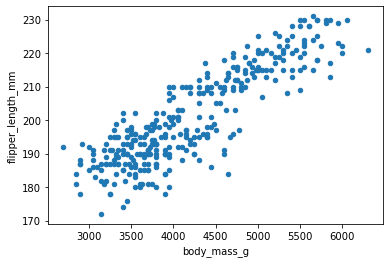

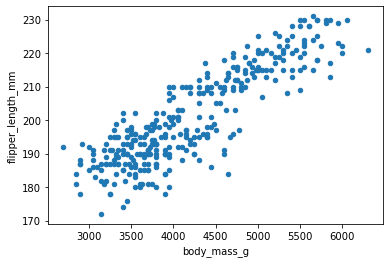

In [32]:
# plot one column against another (body_mass_g','flipper_length_mm')
df.plot.scatter(x='body_mass_g', y='flipper_length_mm')

# Can also reference column numbers
df.plot.scatter(x=df.columns[5], y='flipper_length_mm' ) 

2. Visualize the distribution of Bill Length

<AxesSubplot:ylabel='Frequency'>

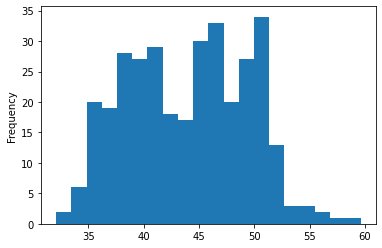

In [39]:
# we have multiple options: histogram, violin, kde (kernel density estimation), boxplot
df['bill_length_mm'].plot.hist(bins=20)

3. Are male penguins heavier than female penguins?

<AxesSubplot:ylabel='Frequency'>

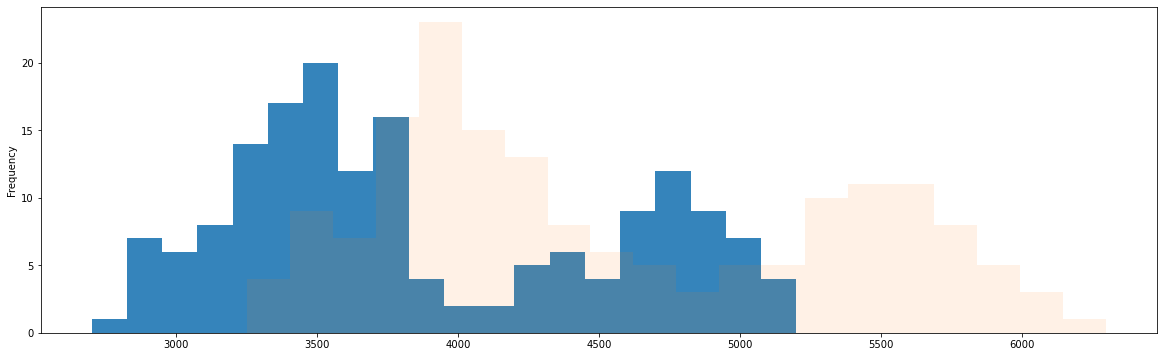

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
# selecting by conditions, plotting two in one, introducing alpha, histogram
df['body_mass_g'].loc[df['sex']== 'female'].plot.hist(bins=20, alpha=0.9) 
df['body_mass_g'].loc[df['sex'] == 'male'].plot.hist(bins=20, alpha=0.1)


## 2. Plotting with Matplotlib

In [46]:
# print all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [47]:
# Call the function once in the beginning of your script/ notebook.
plt.style.use('ggplot')

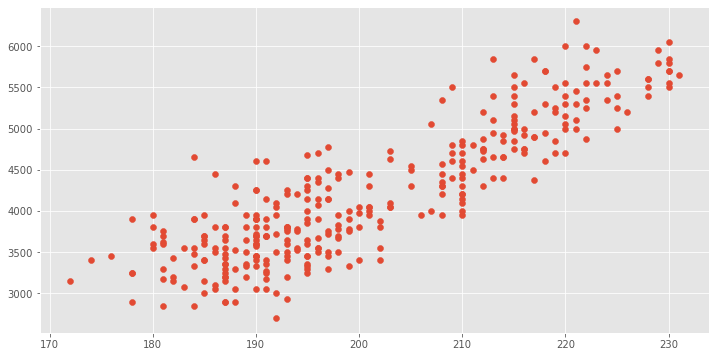

In [49]:
# Also set the figure parameters once at the start:
plt.figure(figsize=(12,6)) #Always first step! Set plot to 12, 6 inches!


# or: plt.plot, plt.bar, plt.boxplot, plt.hist,... 
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])


#plt.show()  

### Add title and labels

Text(0, 0.5, 'Body Mass (g)')

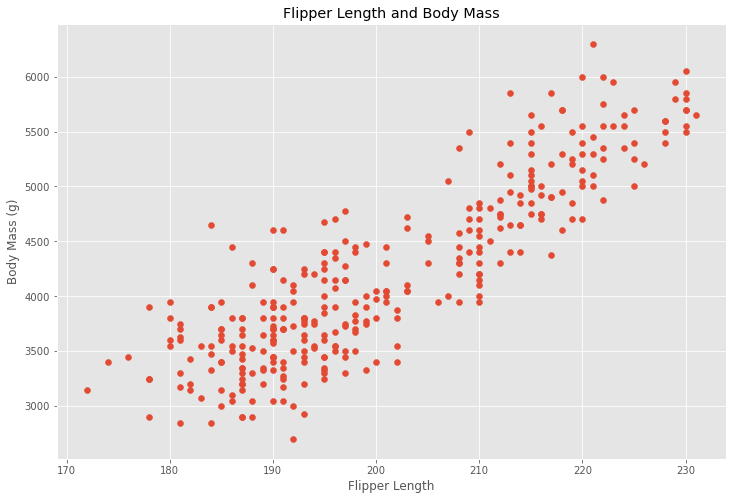

In [50]:
plt.figure(figsize=(12,8)) 

plt.scatter(df['flipper_length_mm'], df['body_mass_g']) 
plt.title('Flipper Length and Body Mass')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass (g)')
#plt.show()



### More formatting

Text(0, 0.5, 'Body Mass (g)')

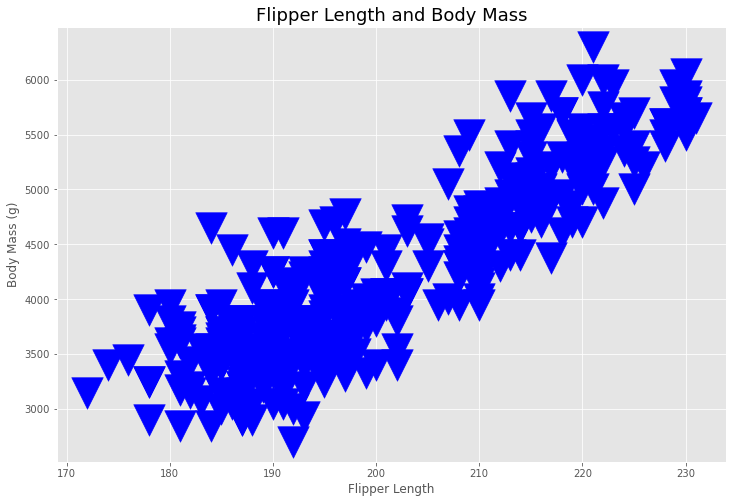

In [52]:
plt.figure(figsize=(12,8)) 

plt.scatter(df['flipper_length_mm'], df['body_mass_g'], s=1000, c='blue', marker='v') 
plt.title('Flipper Length and Body Mass', fontsize=18)
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass (g)')
#plt.show()



In [53]:
## Plot different species in different colors, which species do we have?
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [54]:
## Filtering by species
df['body_mass_g'].loc[df['species']== 'Gentoo']

152    4500.0
153    5700.0
154    4450.0
155    5700.0
156    5400.0
        ...  
270    4925.0
272    4850.0
273    5750.0
274    5200.0
275    5400.0
Name: body_mass_g, Length: 119, dtype: float64

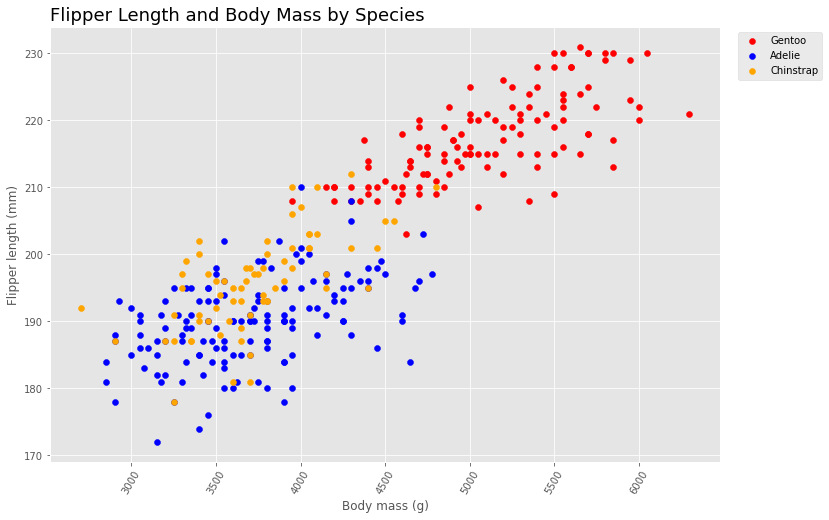

In [57]:
#set plot size
plt.figure(figsize= (12,8))



#plot first species
plt.scatter(df['body_mass_g'].loc[df['species'] == 'Gentoo'], df['flipper_length_mm'].loc[df['species'] == 'Gentoo'], label='Gentoo', c='red')

#plot second one

plt.scatter(df['body_mass_g'].loc[df['species'] == 'Adelie'], df['flipper_length_mm'].loc[df['species'] == 'Adelie'], label='Adelie', c='blue')

#plot third one

plt.scatter(df['body_mass_g'].loc[df['species'] == 'Chinstrap'], df['flipper_length_mm'].loc[df['species'] == 'Chinstrap'], label='Chinstrap', c='orange')


#plt title
plt.title('Flipper Length and Body Mass by Species', fontsize=18, loc='left')


#annotate
plt.xlabel('Body mass (g)')
plt.ylabel('Flipper length (mm)')

# rotate data ticks labels
plt.xticks(rotation=60)

#add legend

plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

## Save the plot as a png file with relative path
plt.savefig('plot.png') 

## Save the plot as a png file with path of choice
save_results_to = '/home/parvin/Desktop/images/'
plt.savefig(save_results_to + 'image.png', dpi = 300)

In [ ]:
## 3. Plotting with Seaborn

*More examples in the course material*

In [58]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

Text(0.5, 1.0, 'Bill Length and Depth by Species')

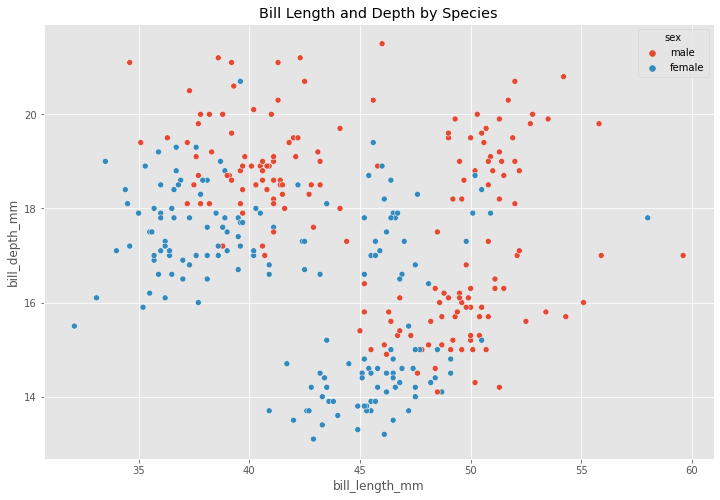

In [59]:
plt.figure(figsize= (12,8))

sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex')  

plt.title('Bill Length and Depth by Species')




# color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

#sns.despine()

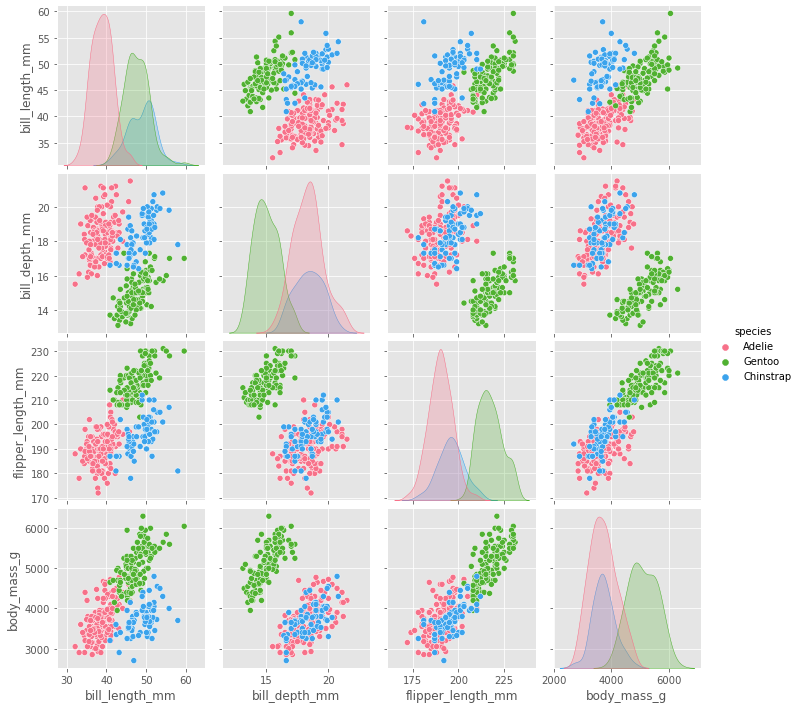

In [60]:
sns.pairplot(df, hue ='species', palette='husl')
#sns.despine()

### How to use colors:



https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization 

https://projects.susielu.com/viz-palette

## More advanced plotting
### Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). You can create a grid of plots, e.g. with two plots in one figure like this:

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

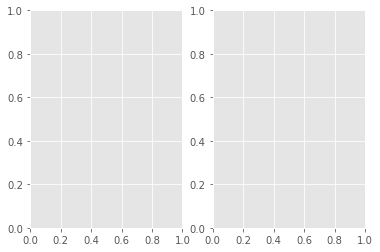

In [61]:
plt.subplots(nrows=1, ncols=2) 

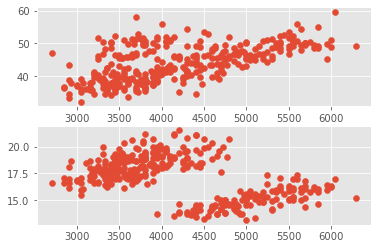

In [62]:
my_plot, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
ax1.scatter(df['body_mass_g'], df['bill_length_mm'])   #specifies first plot
ax2.scatter(df['body_mass_g'], df['bill_depth_mm'])     # specifies second plot

### 3D Plot

/tmp/ipykernel_4877/3778000279.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


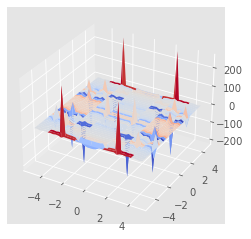

In [63]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**4 + Y**2)
Z = np.tan(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=5, cmap=cm.coolwarm)
plt.show()

# Article:
https://towardsdatascience.com/matplotlib-cheat-sheet-f441c43971c4

# Exercise:
- Pick one of the plot functions from the seaborn, 20 minutes



In [40]:
## Distplot

## Violinplot

## Countplot

## Boxplot

## Take Home Message

    1-Understand the context (who, what, how)
    2-Choose an appropriate display (lines, bars, ...)
    3-Eliminate clutter
    4-Draw attention where you want your audience to focus
    5-Think like a designer: Form follows function
    6-Tell a story